In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
class PostgresCon(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="econdb",
                                           user = "postgres",
                                           password = "Justdoit007",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

In [5]:
con = PostgresCon().getConnection()

Connection to DB established!


# Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table 

### Division wise

In [6]:
cur = con.cursor()
select_stmnt = "SELECT  st.division, sum(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.store_dim st " \
                "WHERE ft.store_key = st.store_key " \
                "GROUP BY CUBE(st.division) ORDER BY st.division " 
cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

In [7]:
records

[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [8]:
dataframe = pd.DataFrame(records, columns=['division', 'total price'])
dataframe = dataframe.drop(7)
dataframe

division  total price
0     BARISAL   7520343.75
1  CHITTAGONG  19763595.00
2       DHAKA  40764619.75
3      KHULNA  11311610.50
4    RAJSHAHI  12099196.00
5     RANGPUR   8429836.50
6      SYLHET   5512234.25

In [9]:
dataframe['total price'] = dataframe['total price'].astype('float64')

In [10]:
dataframe.dtypes

division        object
total price    float64
dtype: object

In [11]:
dataframe

division  total price
0     BARISAL   7520343.75
1  CHITTAGONG  19763595.00
2       DHAKA  40764619.75
3      KHULNA  11311610.50
4    RAJSHAHI  12099196.00
5     RANGPUR   8429836.50
6      SYLHET   5512234.25

<Axes: >

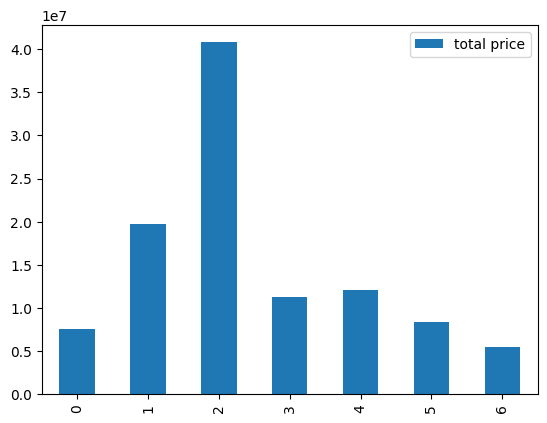

In [12]:
dataframe.plot.bar(y='total price')

## year wise

In [13]:
con = PostgresCon().getConnection()
cur = con.cursor()
select_stmnt = "SELECT  tt.year, sum(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.time_dim tt " \
                "WHERE ft.time_key = tt.time_key " \
                "GROUP BY CUBE(tt.year) ORDER BY tt.year " 
cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

Connection to DB established!


In [14]:
records

[(2014, Decimal('14334731.25')),
 (2015, Decimal('15095720.25')),
 (2016, Decimal('14976508.25')),
 (2017, Decimal('15015806.00')),
 (2018, Decimal('15108197.25')),
 (2019, Decimal('14949510.25')),
 (2020, Decimal('15037190.25')),
 (2021, Decimal('883772.25')),
 (None, Decimal('105401435.75'))]

In [15]:
df_year = pd.DataFrame(records, columns=['year', 'total price'])
df_year = df_year.drop(8)
df_year

year  total price
0  2014.0  14334731.25
1  2015.0  15095720.25
2  2016.0  14976508.25
3  2017.0  15015806.00
4  2018.0  15108197.25
5  2019.0  14949510.25
6  2020.0  15037190.25
7  2021.0    883772.25

In [16]:
df_year = df_year.set_index(['year'])

In [17]:
df_year

total price
year               
2014.0  14334731.25
2015.0  15095720.25
2016.0  14976508.25
2017.0  15015806.00
2018.0  15108197.25
2019.0  14949510.25
2020.0  15037190.25
2021.0    883772.25

In [18]:
df_year['total price'] = df_year['total price'].astype('float64')

<Axes: xlabel='year'>

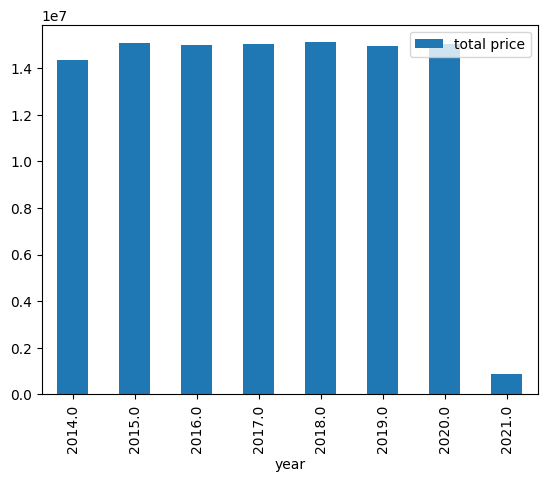

In [19]:
df_year.plot.bar(y='total price')

## District wise

In [20]:
con = PostgresCon().getConnection()
cur = con.cursor()
select_stmnt = "SELECT  st.district, sum(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.store_dim st " \
                "WHERE ft.store_key = st.store_key " \
                "GROUP BY CUBE(st.district) ORDER BY st.district " 
cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

Connection to DB established!


In [21]:
records

[('BAGERHAT', Decimal('1307651.00')),
 ('BANDARBAN', Decimal('995360.75')),
 ('BARGUNA', Decimal('869041.00')),
 ('BARISAL', Decimal('2897237.75')),
 ('BHOLA', Decimal('1012205.75')),
 ('BOGRA', Decimal('1716452.75')),
 ('BRAHMANBARIA', Decimal('1328234.25')),
 ('CHANDPUR', Decimal('1153276.75')),
 ('CHAPAI NABABGANJ', Decimal('739447.50')),
 ('CHITTAGONG', Decimal('7292985.50')),
 ('CHUADANGA', Decimal('563909.75')),
 ('COMILLA', Decimal('2286898.25')),
 ("COX'S BAZAR", Decimal('1188128.75')),
 ('DHAKA', Decimal('23597621.00')),
 ('DINAJPUR', Decimal('1871005.75')),
 ('FARIDPUR', Decimal('1287383.75')),
 ('FENI', Decimal('847873.50')),
 ('GAIBANDHA', Decimal('997077.75')),
 ('GAZIPUR', Decimal('722286.25')),
 ('GOPALGANJ', Decimal('731312.75')),
 ('HABIGANJ', Decimal('1153998.00')),
 ('JAMALPUR', Decimal('1009760.00')),
 ('JESSORE', Decimal('1132590.50')),
 ('JHALOKATI', Decimal('570807.25')),
 ('JHENAIDAH', Decimal('869991.25')),
 ('JOYPURHAT', Decimal('735378.50')),
 ('KHAGRACHHARI'

In [30]:
df_district = pd.DataFrame(records, columns=['district', 'total price'])
df_district = df_district.drop(64)
df_district

district total price
0     BAGERHAT  1307651.00
1    BANDARBAN   995360.75
2      BARGUNA   869041.00
3      BARISAL  2897237.75
4        BHOLA  1012205.75
..         ...         ...
59   SIRAJGANJ  1295100.75
60   SUNAMGANJ  1593774.00
61      SYLHET  1727717.25
62     TANGAIL  1774650.25
63  THAKURGAON   729934.25

[64 rows x 2 columns]

In [31]:
df_district['total price'] = df_district['total price'].astype('float64')

In [32]:
df_district

district  total price
0     BAGERHAT   1307651.00
1    BANDARBAN    995360.75
2      BARGUNA    869041.00
3      BARISAL   2897237.75
4        BHOLA   1012205.75
..         ...          ...
59   SIRAJGANJ   1295100.75
60   SUNAMGANJ   1593774.00
61      SYLHET   1727717.25
62     TANGAIL   1774650.25
63  THAKURGAON    729934.25

[64 rows x 2 columns]

In [33]:
df_district = df_district.set_index(['district'])

<Axes: xlabel='district'>

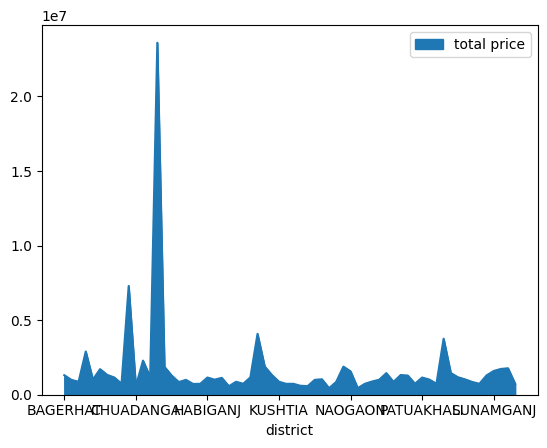

In [47]:
df_district.plot.area()

# Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table

## customer

In [48]:
con = PostgresCon().getConnection()
cur = con.cursor()
select_stmnt = "SELECT  ct.name, sum(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.customer_dim ct " \
                "WHERE ft.customer_key = ct.customer_key " \
                "GROUP BY CUBE(ct.name) ORDER BY ct.name " 
cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

Connection to DB established!


In [49]:
records

[('-', Decimal('20643.50')),
 ('aafreen fatima', Decimal('11174.75')),
 ('aafrin', Decimal('22136.75')),
 ('aafrin @ dolly', Decimal('23529.75')),
 ('aaftaab husan', Decimal('9682.00')),
 ('aakanksha', Decimal('11469.00')),
 ('aaliya', Decimal('21663.25')),
 ('aamina', Decimal('12649.25')),
 ('aamir', Decimal('10134.00')),
 ('aamir hussain', Decimal('10892.50')),
 ('aamod & pramod', Decimal('12280.25')),
 ('aamrin jahan', Decimal('11622.00')),
 ('aanamika misra', Decimal('8929.25')),
 ('aanchal', Decimal('35703.50')),
 ('aanik with her son', Decimal('8568.25')),
 ('aansi devi', Decimal('9909.00')),
 ('aanya @ china', Decimal('11443.50')),
 ('aaradhana @ priyanka', Decimal('11469.25')),
 ('aarifa bano', Decimal('11295.75')),
 ('aarifun bivi', Decimal('13139.25')),
 ('aarti', Decimal('661675.25')),
 ('aarti @ kajal', Decimal('12108.50')),
 ('aarti @ noni', Decimal('12335.50')),
 ('aarti bunkar', Decimal('13661.75')),
 ('aarti devi', Decimal('26537.00')),
 ('aarti diwakar', Decimal('10892

In [50]:
df_customer = pd.DataFrame(records, columns=['name', 'total price'])
df_customer

name   total price
0                  -      20643.50
1     aafreen fatima      11174.75
2             aafrin      22136.75
3     aafrin @ dolly      23529.75
4      aaftaab husan       9682.00
...              ...           ...
4533           मन्जू      10575.75
4534            माया       9862.50
4535            सरोज      11280.00
4536          सानिया      11010.00
4537            None  105401435.75

[4538 rows x 2 columns]

In [51]:
df_customer = df_customer.drop(4537)

In [52]:
df_customer

name total price
0                  -    20643.50
1     aafreen fatima    11174.75
2             aafrin    22136.75
3     aafrin @ dolly    23529.75
4      aaftaab husan     9682.00
...              ...         ...
4532           बबीता    10509.75
4533           मन्जू    10575.75
4534            माया     9862.50
4535            सरोज    11280.00
4536          सानिया    11010.00

[4537 rows x 2 columns]

In [56]:
df_customer.dtypes

name           object
total price    object
dtype: object

In [57]:
df_customer['total price'] = df_customer['total price'].astype('float64')

<Axes: >

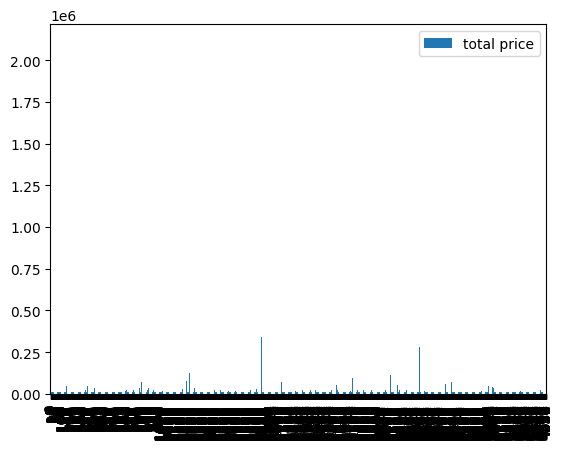

In [58]:
df_customer.plot.bar(y='total price')

## transaction

In [53]:
con = PostgresCon().getConnection()
cur = con.cursor()
select_stmnt = "SELECT  tt.trans_type, sum(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.trans_dim tt " \
                "WHERE ft.payment_key = tt.payment_key " \
                "GROUP BY CUBE(tt.trans_type) ORDER BY tt.trans_type " 
cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

Connection to DB established!


In [54]:
records

[('card', Decimal('94583038.50')),
 ('cash', Decimal('2708515.75')),
 ('mobile', Decimal('8109881.50')),
 (None, Decimal('105401435.75'))]

In [75]:
df_trans = pd.DataFrame(records, columns=['trans type', 'total price'])

In [76]:
df_trans

trans type   total price
0       card   94583038.50
1       cash    2708515.75
2     mobile    8109881.50
3       None  105401435.75

In [77]:
df_trans['total price'] = df_trans['total price'].astype('float64')
df_trans = df_trans.drop(3)

In [78]:
df_trans = df_trans.set_index(['trans type'])

In [79]:
df_trans

total price
trans type             
card        94583038.50
cash         2708515.75
mobile       8109881.50

<Axes: ylabel='total price'>

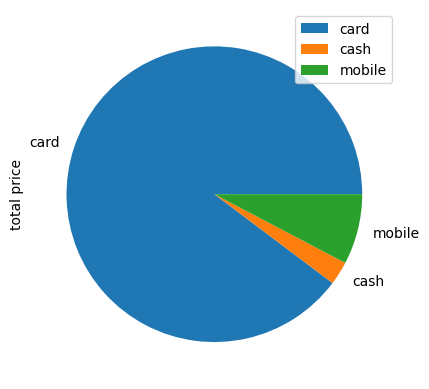

In [80]:
df_trans.plot.pie(y='total price')

# Q3: Total sales in Barisal

In [36]:
cur = con.cursor()
select_stmnt = "SELECT  st.division, sum(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.store_dim st " \
                "WHERE ft.store_key = st.store_key AND st.division = 'BARISAL' " \
                "GROUP BY CUBE(st.division) ORDER BY st.division " 
cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

In [37]:
records

[('BARISAL', Decimal('7520343.75')), (None, Decimal('7520343.75'))]

In [38]:
df_barisal = pd.DataFrame(records, columns=['district', 'total price'])

In [39]:
df_barisal = df_barisal.drop(1)
df_barisal

district total price
0  BARISAL  7520343.75

# Q4: Total sales in 2015

In [40]:
con = PostgresCon().getConnection()
cur = con.cursor()
select_stmnt = "SELECT tt.year, sum(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.time_dim tt " \
                "WHERE ft.time_key = tt.time_key AND tt.year = 2015 " \
                "GROUP BY CUBE(tt.year) ORDER BY tt.year " 
cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

Connection to DB established!


In [41]:
records

[(2015, Decimal('15095720.25')), (None, Decimal('15095720.25'))]

In [42]:
df_2015 = pd.DataFrame(records, columns=['year', 'total_price'])
df_2015 = df_2015.drop(1)
df_2015

year  total_price
0  2015.0  15095720.25

# Q5: Total sales of Barisal in 2015

In [43]:
cur = con.cursor()
select_stmnt = "SELECT sum(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.store_dim st, star_schema.time_dim tt " \
                "WHERE ft.store_key = st.store_key AND ft.time_key = tt.time_key AND st.division = 'BARISAL' AND tt.year = 2015 " \
                "GROUP BY st.division,tt.year ORDER BY st.division " 
cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

In [44]:
records

[(Decimal('1076902.75'),)]

# Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

### S1-> item1 -> quantity_sales
### S1-> item2 -> quantity_sales
### S1-> item3 -> quantity_sales

In [105]:
con = PostgresCon().getConnection()
cur = con.cursor()
select_stmnt = " SELECT rank_filter.* FROM (SELECT st.store_key, it.item_name, sum(ft.quantity), RANK() OVER (PARTITION BY st.store_key ORDER BY sum(ft.quantity) DESC) " \
                "FROM star_schema.fact_table ft, star_schema.item_dim it, star_schema.store_dim st " \
                "WHERE ft.store_key = st.store_key AND ft.item_key = it.item_key " \
                "GROUP BY st.store_key, it.item_name ORDER BY st.store_key ASC, sum(ft.quantity) DESC) rank_filter WHERE RANK <= 3 "
cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

Connection to DB established!


In [82]:
records

[('S0001', 'Pepsi - 12 oz cans', 92, 1),
 ('S0001', 'Muscle Milk Protein Shake Van. 11oz', 90, 2),
 ('S0001', 'Hefty Supreme Foam Plates 6 inch', 78, 3),
 ('S0002', 'Planters Nut-trition 1.5 oz ', 83, 1),
 ('S0002', 'Altoids Small Packs Variety', 80, 2),
 ('S0002', 'AquaFina Purified Drinking Water 16oz', 78, 3),
 ('S0002', 'Muscle Milk Protein Shake Van. 11oz', 78, 3),
 ('S0002', 'Hefty Supreme Foam Bowls 12oz', 78, 3),
 ('S0003', 'Sprite - 12 oz cans', 122, 1),
 ('S0003', 'Diet Coke - 12 oz cans', 109, 2),
 ('S0003', 'Muscle Milk Protein Shake Van. 11oz', 76, 3),
 ('S0004', 'Kind  Bars Variety Pack 1.4 oz ', 79, 1),
 ('S0004', 'Muscle Milk Protein Shake Van. 11oz', 69, 2),
 ('S0004', 'Wint O Green LifeSavers Sugar Free', 69, 2),
 ('S0005', 'Diet Coke - 12 oz cans', 144, 1),
 ('S0005', 'Planters Nut-trition 1.5 oz ', 86, 2),
 ('S0005', 'Stirrers Coffee Stirs 7inch', 85, 3),
 ('S0006', 'Snickers Bars 1.8oz', 82, 1),
 ('S0006', 'Pepsi - 12 oz cans', 80, 2),
 ('S0006', 'Advil 2 pill pack

In [83]:
df_q6 = pd.DataFrame(records, columns=['store key', 'item name', 'quantity', 'rank'])
df_q6 = df_q6.set_index(['store key'])

In [84]:
df_q6

item name  quantity  rank
store key                                                         
S0001                           Pepsi - 12 oz cans        92     1
S0001          Muscle Milk Protein Shake Van. 11oz        90     2
S0001             Hefty Supreme Foam Plates 6 inch        78     3
S0002                 Planters Nut-trition 1.5 oz         83     1
S0002                  Altoids Small Packs Variety        80     2
...                                            ...       ...   ...
S0098      Cliff Builders Protein Bar Variety Pack        84     2
S0098                           Pepsi - 12 oz cans        79     3
S0099                           Pepsi - 12 oz cans        93     1
S0099                       Diet Coke - 12 oz cans        87     2
S0099        Coffee-mate Original Powdered Creamer        86     3

[2296 rows x 3 columns]

In [85]:
df_q6 = df_q6.drop(['rank'],axis=1)

In [86]:
df_q6

item name  quantity
store key                                                   
S0001                           Pepsi - 12 oz cans        92
S0001          Muscle Milk Protein Shake Van. 11oz        90
S0001             Hefty Supreme Foam Plates 6 inch        78
S0002                 Planters Nut-trition 1.5 oz         83
S0002                  Altoids Small Packs Variety        80
...                                            ...       ...
S0098      Cliff Builders Protein Bar Variety Pack        84
S0098                           Pepsi - 12 oz cans        79
S0099                           Pepsi - 12 oz cans        93
S0099                       Diet Coke - 12 oz cans        87
S0099        Coffee-mate Original Powdered Creamer        86

[2296 rows x 2 columns]

<Axes: xlabel='store key'>

<Figure size 2000x500 with 0 Axes>

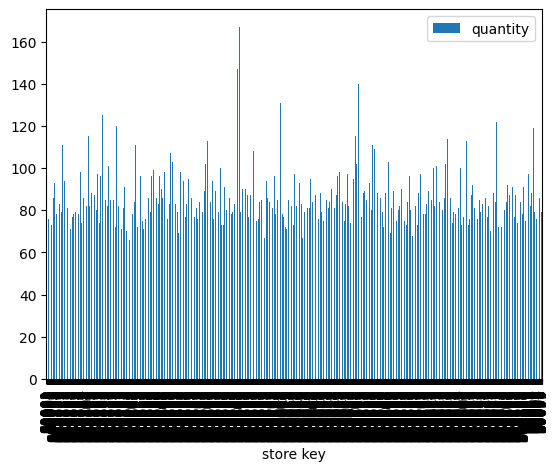

In [91]:
plt.figure(figsize=(20,5))
df_q6.plot.bar(y='quantity')

# Q7: What products have been sold through card or mobile since X days?

In [75]:
x = input('Select number of days: ')
x = int(x)
type(x)

Select number of days: 1400


int

In [80]:
con = PostgresCon().getConnection()
cur = con.cursor()
select_stmnt = "SELECT DISTINCT(it.item_name) " \
                "FROM star_schema.fact_table ft, star_schema.item_dim it, star_schema.time_dim tt, star_schema.trans_dim tr " \
                "WHERE ft.item_key = it.item_key AND ft.time_key = tt.time_key AND tr.payment_key = ft.payment_key AND " \
                " %s >= (CURRENT_DATE::DATE - TO_DATE(tt.date, 'DD-MM-YYYY HH24:MI')::DATE) AND (tr.trans_type = 'Mobile' OR tr.trans_type = 'cash') " \
                "ORDER BY it.item_name " 
print(select_stmnt)
cur.execute(select_stmnt, [x])
records = cur.fetchall()
cur.close()

Connection to DB established!
SELECT DISTINCT(it.item_name) FROM star_schema.fact_table ft, star_schema.item_dim it, star_schema.time_dim tt, star_schema.trans_dim tr WHERE ft.item_key = it.item_key AND ft.time_key = tt.time_key AND tr.payment_key = ft.payment_key AND  %s >= (CURRENT_DATE::DATE - TO_DATE(tt.date, 'DD-MM-YYYY HH24:MI')::DATE) AND (tr.trans_type = 'Mobile' OR tr.trans_type = 'cash') ORDER BY it.item_name 


In [81]:
records

[('100% Juice Box Variety 6.75 oz ',),
 ('A&W Root Beer - 12 oz cans',),
 ('A&W Root Beer Diet - 12 oz cans',),
 ('Advil 2 pill packets',),
 ('All Purpose Cleaner 409 Spray',),
 ('Altoids Small Packs Variety',),
 ('Apple Sauce Variety GoGO Squeeze 3.2oz',),
 ('AquaFina Purified Drinking Water 16oz',),
 ('Austin Cookie Cracker Variety',),
 ('Austin Toasty Crackers w/ PBtr',),
 ('Baked Chips Variety Mix Frito',),
 ("Barq's Root Beer - 12 oz cans",),
 ('Belvita Hard Biscuits Blueberry',),
 ('Belvita Hard Biscuits Cinnamon',),
 ('Belvita Protein Oats Soft Biscuit',),
 ('Blue Diamond Almonds Rstd, Sltd',),
 ('Bounty Paper Towels Select a Size ',),
 ('Breath Savers Peppermints 12/roll ',),
 ('Brisk Lemon Iced Tea - 12 oz cans',),
 ('Cascade Gel Packs Dishwasher',),
 ('Cascade Gel w/ Dawn Dishwasher',),
 ('Charmin Ultra Bath Tissue',),
 ('Cheese and Peanut Butter Crackers',),
 ("Cheetos Flamin' Hot 1 oz",),
 ('Cheez It Original Crackers 1.5oz',),
 ('Cheez It White Cheddar 1.5 oz',),
 ('Cherry

In [83]:
df_q7 = pd.DataFrame(list(records), columns=['Item Name'])
df_q7

Item Name
0          100% Juice Box Variety 6.75 oz 
1               A&W Root Beer - 12 oz cans
2          A&W Root Beer Diet - 12 oz cans
3                     Advil 2 pill packets
4            All Purpose Cleaner 409 Spray
..                                     ...
254        Welch's 100% Juice Variety10 oz
255     Wint O Green LifeSavers Sugar Free
256        Wonderful Pistachios (in shell)
257  Yoplait Original Yogurt Variety Pack 
258            Zoo Animal Cookies/Crackers

[259 rows x 1 columns]

# Q8: What season(quarter) is the worst for each product item? As example,

### item1-> q1
### item2-> q2

In [97]:
con = PostgresCon().getConnection()
cur = con.cursor()

select_stmnt = "SELECT it.item_name, tt.quarter " \
                "FROM star_schema.fact_table ft, star_schema.item_dim it, star_schema.time_dim tt " \
                "WHERE ft.time_key = tt.time_key AND ft.item_key = it.item_key " \
                "GROUP BY it.item_name, tt.quarter ORDER BY it.item_name ASC, sum(ft.quantity) ASC"

cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

Connection to DB established!


In [99]:
df_q8 = pd.DataFrame(records, columns=['item name', 'quarter'])
df_q8

item name quarter
0           100% Juice Box Variety 6.75 oz       Q1
1           100% Juice Box Variety 6.75 oz       Q4
2           100% Juice Box Variety 6.75 oz       Q2
3           100% Juice Box Variety 6.75 oz       Q3
4                A&W Root Beer - 12 oz cans      Q2
...                                     ...     ...
1031  Yoplait Original Yogurt Variety Pack       Q3
1032            Zoo Animal Cookies/Crackers      Q1
1033            Zoo Animal Cookies/Crackers      Q2
1034            Zoo Animal Cookies/Crackers      Q4
1035            Zoo Animal Cookies/Crackers      Q3

[1036 rows x 2 columns]

In [100]:
df_q8.groupby('item name').first()

quarter
item name                                    
100% Juice Box Variety 6.75 oz             Q1
A&W Root Beer - 12 oz cans                 Q2
A&W Root Beer Diet - 12 oz cans            Q4
Advil 2 pill packets                       Q1
All Purpose Cleaner 409 Spray              Q1
...                                       ...
Welch's 100% Juice Variety10 oz            Q2
Wint O Green LifeSavers Sugar Free         Q1
Wonderful Pistachios (in shell)            Q1
Yoplait Original Yogurt Variety Pack       Q1
Zoo Animal Cookies/Crackers                Q1

[259 rows x 1 columns]

# Q9: Break down the total sales of items geographically (division-wise).

### item1-> division1->total_sales
### item1-> division2->total_sales

In [101]:
con = PostgresCon().getConnection()
cur = con.cursor()

select_stmnt = "SELECT it.item_name, st.division, sum(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.item_dim it, star_schema.store_dim st " \
                "WHERE ft.store_key = st.store_key AND ft.item_key = it.item_key " \
                "GROUP BY it.item_name, st.division ORDER BY it.item_name ASC, st.division ASC"

cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

Connection to DB established!


In [102]:
df_q9 = pd.DataFrame(list(records), columns=['item name', 'division', 'total price'])
df_q9

item name    division total price
0     100% Juice Box Variety 6.75 oz      BARISAL     23790.0
1     100% Juice Box Variety 6.75 oz   CHITTAGONG     64950.0
2     100% Juice Box Variety 6.75 oz        DHAKA    141195.0
3     100% Juice Box Variety 6.75 oz       KHULNA     37755.0
4     100% Juice Box Variety 6.75 oz     RAJSHAHI     38730.0
...                               ...         ...         ...
1808      Zoo Animal Cookies/Crackers       DHAKA    118286.0
1809      Zoo Animal Cookies/Crackers      KHULNA     35434.0
1810      Zoo Animal Cookies/Crackers    RAJSHAHI     37100.0
1811      Zoo Animal Cookies/Crackers     RANGPUR     25186.0
1812      Zoo Animal Cookies/Crackers      SYLHET     14728.0

[1813 rows x 3 columns]

In [103]:
df_q9 = df_q9.set_index(['item name'])

In [104]:
df_q9

division total price
item name                                              
100% Juice Box Variety 6.75 oz      BARISAL     23790.0
100% Juice Box Variety 6.75 oz   CHITTAGONG     64950.0
100% Juice Box Variety 6.75 oz        DHAKA    141195.0
100% Juice Box Variety 6.75 oz       KHULNA     37755.0
100% Juice Box Variety 6.75 oz     RAJSHAHI     38730.0
...                                     ...         ...
Zoo Animal Cookies/Crackers           DHAKA    118286.0
Zoo Animal Cookies/Crackers          KHULNA     35434.0
Zoo Animal Cookies/Crackers        RAJSHAHI     37100.0
Zoo Animal Cookies/Crackers         RANGPUR     25186.0
Zoo Animal Cookies/Crackers          SYLHET     14728.0

[1813 rows x 2 columns]

In [105]:
df_q9['total price'] = df_q9['total price'].astype('float64')

In [113]:
df_q9.plot.bar(figsize=(200, 60))

<Axes: xlabel='item name'>

# Q10: What are the average sales of products sales per store monthly?

### S1->M1-> avg_sales
### s1-> M2 -> avg_sales

In [125]:
con = PostgresCon().getConnection()
cur = con.cursor()

select_stmnt = "SELECT CONCAT(st.district, '-', st.upazilla), tt.month, avg(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.time_dim tt, star_schema.store_dim st " \
                "WHERE ft.store_key = st.store_key AND ft.time_key = tt.time_key " \
                "GROUP BY st.store_key, tt.month ORDER BY st.district ASC, st.upazilla ASC, tt.month ASC"

cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

Connection to DB established!


In [126]:
df_q10 = pd.DataFrame(list(records), columns=['store', 'month', 'avg'])
df_q10

store  month                   avg
0         BAGERHAT-BAGERHAT SADAR      1   99.2500000000000000
1         BAGERHAT-BAGERHAT SADAR      2   97.9014423076923077
2         BAGERHAT-BAGERHAT SADAR      3  101.1346153846153846
3         BAGERHAT-BAGERHAT SADAR      4  104.5148809523809524
4         BAGERHAT-BAGERHAT SADAR      5  108.7274774774774775
...                           ...    ...                   ...
8707  THAKURGAON-THAKURGAON SADAR      8  112.6824324324324324
8708  THAKURGAON-THAKURGAON SADAR      9  117.2039473684210526
8709  THAKURGAON-THAKURGAON SADAR     10  101.8673913043478261
8710  THAKURGAON-THAKURGAON SADAR     11  105.8089430894308943
8711  THAKURGAON-THAKURGAON SADAR     12  108.0588235294117647

[8712 rows x 3 columns]

# Custom Analytics Part

## 1. store and time dimensional financial analytics,

### 1.1 What is the total maximum number of quantity sold by a store and in which month?

In [127]:
con = PostgresCon().getConnection()
cur = con.cursor()

select_stmnt = "SELECT CONCAT(st.district, '-', st.upazilla), tt.month, sum(ft.quantity) " \
                "FROM star_schema.fact_table ft, star_schema.time_dim tt, star_schema.store_dim st " \
                "WHERE ft.store_key = st.store_key AND ft.time_key = tt.time_key " \
                "GROUP BY st.store_key, tt.month ORDER BY st.district ASC, st.upazilla ASC, sum(ft.quantity) DESC"

cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

Connection to DB established!


In [128]:
df_11 = pd.DataFrame(list(records), columns=['store', 'month', 'quantity'])
df_11

store  month  quantity
0         BAGERHAT-BAGERHAT SADAR      6       832
1         BAGERHAT-BAGERHAT SADAR      3       782
2         BAGERHAT-BAGERHAT SADAR     11       761
3         BAGERHAT-BAGERHAT SADAR      1       758
4         BAGERHAT-BAGERHAT SADAR     12       700
...                           ...    ...       ...
8707  THAKURGAON-THAKURGAON SADAR     10       697
8708  THAKURGAON-THAKURGAON SADAR      8       689
8709  THAKURGAON-THAKURGAON SADAR      6       661
8710  THAKURGAON-THAKURGAON SADAR      5       613
8711  THAKURGAON-THAKURGAON SADAR      2       569

[8712 rows x 3 columns]

In [129]:
df_11.groupby('store').first()

month  quantity
store                                       
BAGERHAT-BAGERHAT SADAR          6       832
BAGERHAT-CHITALMARI              8       774
BAGERHAT-FAKIRHAT                7       882
BAGERHAT-KACHUA                  5       728
BAGERHAT-MOLLAHAT                8       757
...                            ...       ...
THAKURGAON-BALIADANGI            3       762
THAKURGAON-HARIPUR               5       849
THAKURGAON-PIRGANJ               7       742
THAKURGAON-RANISANKAIL           3       837
THAKURGAON-THAKURGAON SADAR      1       886

[556 rows x 2 columns]

### 1.2 Year wise each store's sales 

In [130]:
con = PostgresCon().getConnection()
cur = con.cursor()

select_stmnt = "SELECT CONCAT(st.district, '-', st.upazilla), tt.year, sum(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.time_dim tt, star_schema.store_dim st " \
                "WHERE ft.store_key = st.store_key AND ft.time_key = tt.time_key " \
                "GROUP BY st.store_key, tt.year ORDER BY st.district ASC, st.upazilla ASC, sum(ft.total_price) DESC"

cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

Connection to DB established!


In [143]:
df_12 = pd.DataFrame(list(records), columns=['store', 'year', 'total price'])
df_12

store  year total price
0         BAGERHAT-BAGERHAT SADAR  2020    24701.50
1         BAGERHAT-BAGERHAT SADAR  2019    22645.75
2         BAGERHAT-BAGERHAT SADAR  2018    20994.50
3         BAGERHAT-BAGERHAT SADAR  2016    19166.00
4         BAGERHAT-BAGERHAT SADAR  2014    18643.50
...                           ...   ...         ...
5803  THAKURGAON-THAKURGAON SADAR  2014    21186.50
5804  THAKURGAON-THAKURGAON SADAR  2016    20144.75
5805  THAKURGAON-THAKURGAON SADAR  2017    20080.00
5806  THAKURGAON-THAKURGAON SADAR  2015    19779.75
5807  THAKURGAON-THAKURGAON SADAR  2021     2439.00

[5808 rows x 3 columns]

In [144]:
df_12 = df_12.set_index(['year'])

In [145]:
df_12['total price'] = df_12['total price'].astype('float64')

In [146]:
df_12

store  total price
year                                          
2020      BAGERHAT-BAGERHAT SADAR     24701.50
2019      BAGERHAT-BAGERHAT SADAR     22645.75
2018      BAGERHAT-BAGERHAT SADAR     20994.50
2016      BAGERHAT-BAGERHAT SADAR     19166.00
2014      BAGERHAT-BAGERHAT SADAR     18643.50
...                           ...          ...
2014  THAKURGAON-THAKURGAON SADAR     21186.50
2016  THAKURGAON-THAKURGAON SADAR     20144.75
2017  THAKURGAON-THAKURGAON SADAR     20080.00
2015  THAKURGAON-THAKURGAON SADAR     19779.75
2021  THAKURGAON-THAKURGAON SADAR      2439.00

[5808 rows x 2 columns]

store
BAGERHAT-BAGERHAT SADAR        Axes(0.125,0.11;0.775x0.77)
BAGERHAT-CHITALMARI            Axes(0.125,0.11;0.775x0.77)
BAGERHAT-FAKIRHAT              Axes(0.125,0.11;0.775x0.77)
BAGERHAT-KACHUA                Axes(0.125,0.11;0.775x0.77)
BAGERHAT-MOLLAHAT              Axes(0.125,0.11;0.775x0.77)
                                          ...             
THAKURGAON-BALIADANGI          Axes(0.125,0.11;0.775x0.77)
THAKURGAON-HARIPUR             Axes(0.125,0.11;0.775x0.77)
THAKURGAON-PIRGANJ             Axes(0.125,0.11;0.775x0.77)
THAKURGAON-RANISANKAIL         Axes(0.125,0.11;0.775x0.77)
THAKURGAON-THAKURGAON SADAR    Axes(0.125,0.11;0.775x0.77)
Name: total price, Length: 556, dtype: object

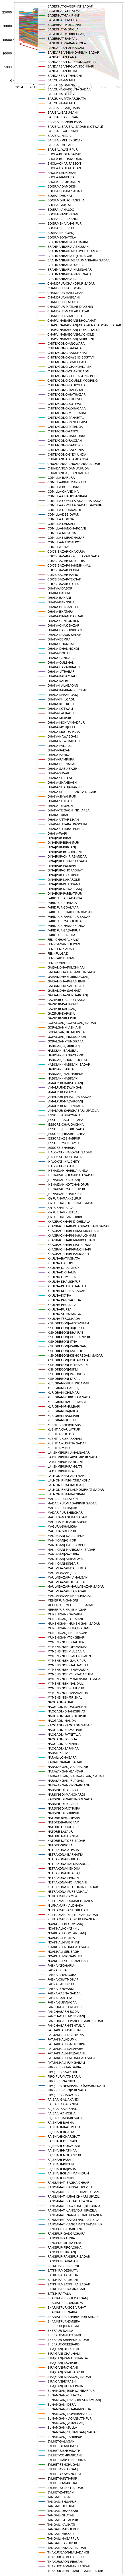

In [147]:
df_12.groupby('store')['total price'].plot(legend=True)